In [1]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import time
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Set up Tweepy API Authentication
from wusiapikeys import twitter_plotbot
consumer_key= twitter_plotbot["consumer_key"]
consumer_secret= twitter_plotbot["consumer_secret"]
access_token= twitter_plotbot["access_token"]
access_token_secret= twitter_plotbot["access_token_secret"]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [ ]:
# read the team name from file
team_pd=pd.read_excel("Resources/MLS_Historical_Attendance.xlsx","MLS",index_col="Rank")
team_list = team_pd["Team"].tolist()

teams=['Atlanta United FC',
 'Seattle Sounders',
 'Toronto FC',
 'Orlando City',
 'New York City FC',
 'Los Angeles Galaxy',
 'Vancouver Whitecaps',
 'New York Red Bulls',
 'Portland Timbers',
 'Minnesota United FC',
 'Impact de Montréal',
 'San Jose Earthquakes',
 'Sporting Kansas City',
 'New England Revolution',
 'Real Salt Lake',
 'D.C. United',
 'Houston Dynamo',
 'Chicago Fire',
 'Philadelphia Union',
 'Columbus Crew',
 'Colorado Rapids',
 'FC Dallas']

hash_tags ={'Atlanta United FC':["#ATLUTD"],
  'Seattle Sounders':["#Sounders"],
 'Toronto FC':["#TFC"],
 'Orlando City':["#OCSC"],
 'New York City FC':["#NYCFC"],
 'Los Angeles Galaxy':["#LAGalaxy"],
 'Vancouver Whitecaps':["#VWFC"],
 'New York Red Bulls':["#RBNY"],
 'Portland Timbers':["#PTFC"],
 'Minnesota United FC':["#MNUFC"],
 'Impact de Montréal':["#IMFC"],
 'San Jose Earthquakes':["#SJEartquakes"],
 'Sporting Kansas City':["#SportingKC"],
 'New England Revolution':["#NERevs"],
 'Real Salt Lake':["#RSL"],
 'D.C. United':["#DCU"],
 'Houston Dynamo':["#HoustonDynamo","#foreverorange"],
 'Chicago Fire':["#cf97"],
 'Philadelphia Union':["#DOOP","#PhiladelphiaUnion"],
 'Columbus Crew':["#SaveTheCrew","#CrewSC","#Crew96"],
 'Colorado Rapids':["#Rapids96"],
 'FC Dallas':["#FCDallas"]}

In [3]:
## team name list
teams=['Atlanta United FC', 'Seattle Sounders', 'Toronto FC', 'Orlando City', 'New York City FC', 'Los Angeles Galaxy', 'Vancouver Whitecaps', 'New York Red Bulls', 'Portland Timbers', 'Minnesota United FC', 'Impact de Montréal', 'San Jose Earthquakes', 'Sporting Kansas City', 'New England Revolution', 'Real Salt Lake', 'D.C. United', 'Houston Dynamo', 'Chicago Fire', 'Philadelphia Union', 'Columbus Crew', 'Colorado Rapids', 'FC Dallas']

## team name: hash_tags dictionary
hash_tags ={'Atlanta United FC':["#ATLUTD","#UniteAndConquer"],
            'Seattle Sounders':["#Sounders"], 
            'Toronto FC':["#TFC"],
            'Orlando City':["#OCSC","#FaceOfCity","#NeverHuntAlone","#VamosOrlando"], 
            'New York City FC':["#NYCFC","#ForTheCity"], 
            'Los Angeles Galaxy':["#LAGalaxy"], 
            'Vancouver Whitecaps':["#VWFC"], 
            'New York Red Bulls':["#RBNY","#REDTogether"], 
            'Portland Timbers':["#PTFC","RCTID"],
            'Minnesota United FC':["#MNUFC"],
            'Impact de Montréal':["#IMFC"],
            'San Jose Earthquakes':["#Quakes74","#ForwardAsOne"],
            'Sporting Kansas City':["#SportingKC","#ForGloryForCity"],
            'New England Revolution':["#NERevs"], 
            'Real Salt Lake':["#RSL"], 
            'D.C. United':["#DCU"], 
            'Houston Dynamo':["#HoustonDynamo","#foreverorange"],
            'Chicago Fire':["#cf97"],
            'Philadelphia Union':["#DOOP","#PhiladelphiaUnion","#joinordie"],
            'Columbus Crew':["#SaveTheCrew","#CrewSC","#Crew96","#ForColumbus"], 
            'Colorado Rapids':["#Rapids96"],
            'FC Dallas':["#FCDallas","#ChallengeAll"]}

In [4]:
# define function for search hashtag and conduct sentimental analysis
# return the average sentimental analysis score for all hash tags
def senti_analysis(hash_tags=[]):
    
    senti_score=[] #initialize score list
    count_of_tweets=0
    
    for hash_tag in hash_tags:
        print(hash_tag)
        
        last_id=None #initialize last id searched
        
        for i in range(1,6): ## do 5 searches for each hash tag
            print(f"search{i}------------------------------------------------------------------")
            try:
                public_tweets = api.search(q=hash_tag,count=100,max_id=last_id)["statuses"] ## search 100 tweets per search
                #print(f"{len(public_tweets)}")
                print(f"last twitter tweeted at {public_tweets[0]['created_at']}")

                last_id=public_tweets[-1]["id"] # get the last id for next search
                
                if i==1:
                    latest_twitter = public_tweets[0]["created_at"] 
                
                earliest_twitter = public_tweets[-1]["created_at"] 
                
                count_of_tweets += len(public_tweets)

                for tweet in public_tweets:
                    result = analyzer.polarity_scores(tweet["text"])
                    senti_score.append(result["compound"])
                    
            except Exception as e:
                print(f"error: {e}")

            time.sleep(1) #pause for 1 second
    
    return np.mean(senti_score),count_of_tweets,latest_twitter,earliest_twitter
            


In [5]:
senti_score_ls=[] # initialize a list to store sentimental analysis result for all teams

for team in teams:
    team_hash_tag = hash_tags[team]
    #print(team_hash_tag)
    
    senti_score,count_of_tweets,latest_twitter,earliest_twitter = senti_analysis(team_hash_tag)
    
    senti_score_ls.append({"team name":team,
                           "average polarity score":senti_score,
                           "number of tweets":count_of_tweets,
                           "from":earliest_twitter,
                           "to":latest_twitter,}) 

#ATLUTD
search1------------------------------------------------------------------
last twitter tweeted at Sat Jul 28 14:47:44 +0000 2018
search2------------------------------------------------------------------
last twitter tweeted at Sat Jul 28 03:27:14 +0000 2018
search3------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 20:20:44 +0000 2018
search4------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 13:09:02 +0000 2018
search5------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 00:34:11 +0000 2018
#UniteAndConquer
search1------------------------------------------------------------------
last twitter tweeted at Sat Jul 28 14:35:55 +0000 2018
search2------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 22:21:40 +0000 2018
search3-----------------------------------------------------------------

search4------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 21:34:48 +0000 2018
search5------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 17:56:09 +0000 2018
#REDTogether
search1------------------------------------------------------------------
last twitter tweeted at Sat Jul 28 14:38:06 +0000 2018
search2------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 20:20:39 +0000 2018
search3------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 10:40:21 +0000 2018
search4------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 07:47:27 +0000 2018
search5------------------------------------------------------------------
last twitter tweeted at Thu Jul 26 21:27:46 +0000 2018
#PTFC
search1------------------------------------------------------------------
last

search3------------------------------------------------------------------
last twitter tweeted at Thu Jul 19 22:59:59 +0000 2018
search4------------------------------------------------------------------
error: list index out of range
search5------------------------------------------------------------------
error: list index out of range
#foreverorange
search1------------------------------------------------------------------
last twitter tweeted at Sat Jul 28 14:40:35 +0000 2018
search2------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 02:32:03 +0000 2018
search3------------------------------------------------------------------
last twitter tweeted at Thu Jul 26 02:56:47 +0000 2018
search4------------------------------------------------------------------
last twitter tweeted at Wed Jul 25 23:38:37 +0000 2018
search5------------------------------------------------------------------
last twitter tweeted at Tue Jul 24 23:22:53 +0000 2018
#

Rate limit reached. Sleeping for: 561


#FCDallas
search1------------------------------------------------------------------
last twitter tweeted at Sat Jul 28 12:14:30 +0000 2018
search2------------------------------------------------------------------
last twitter tweeted at Thu Jul 26 22:52:15 +0000 2018
search3------------------------------------------------------------------
last twitter tweeted at Wed Jul 25 22:10:25 +0000 2018
search4------------------------------------------------------------------
last twitter tweeted at Tue Jul 24 22:15:00 +0000 2018
search5------------------------------------------------------------------
last twitter tweeted at Tue Jul 24 14:08:42 +0000 2018
#ChallengeAll
search1------------------------------------------------------------------
last twitter tweeted at Fri Jul 27 19:07:51 +0000 2018
search2------------------------------------------------------------------
last twitter tweeted at Sun Jul 22 04:11:58 +0000 2018
search3------------------------------------------------------------------

In [6]:
# convert the result into panda dataframe
senti_score_df = pd.DataFrame(senti_score_ls)

#set index
senti_score_df.set_index("team name",inplace=True)
senti_score_df = senti_score_df[["average polarity score","number of tweets","from","to"]]

#add hash tag to the table
hash_tag_df = pd.Series(hash_tags,name="hash tag").to_frame()
hash_tag_df

final_df=senti_score_df.merge(hash_tag_df,right_index=True,left_index=True)
final_df

,average polarity score,number of tweets,from,to,hash tag
team name,,,,,
Atlanta United FC,0.181403,980,Mon Jul 23 02:53:51 +0000 2018,Sat Jul 28 14:35:55 +0000 2018,"[#ATLUTD, #UniteAndConquer]"
Seattle Sounders,0.241223,500,Mon Jul 23 19:37:37 +0000 2018,Sat Jul 28 14:07:59 +0000 2018,[#Sounders]
Toronto FC,0.150760,500,Wed Jul 25 20:04:08 +0000 2018,Sat Jul 28 14:28:55 +0000 2018,[#TFC]
Orlando City,0.041218,1444,Wed Jul 25 01:09:37 +0000 2018,Sat Jul 28 14:44:33 +0000 2018,"[#OCSC, #FaceOfCity, #NeverHuntAlone, #VamosOr..."
New York City FC,0.027967,1000,Fri Jul 27 02:18:58 +0000 2018,Sat Jul 28 14:45:51 +0000 2018,"[#NYCFC, #ForTheCity]"
Los Angeles Galaxy,0.086865,500,Fri Jul 27 14:32:06 +0000 2018,Sat Jul 28 14:44:46 +0000 2018,[#LAGalaxy]
Vancouver Whitecaps,0.266070,500,Fri Jul 27 00:17:58 +0000 2018,Sat Jul 28 14:41:27 +0000 2018,[#VWFC]
New York Red Bulls,0.239865,996,Thu Jul 26 20:42:26 +0000 2018,Sat Jul 28 14:38:06 +0000 2018,"[#RBNY, #REDTogether]"
Portland Timbers,0.115658,812,Fri Jul 27 16:51:26 +0000 2018,Sat Jul 28 14:42:23 +0000 2018,"[#PTFC, RCTID]"


In [9]:
#export result to csv file
final_df.to_csv("../Output/sentimental analysis result.csv")

## Attendance vs.Polarity Score

In [10]:
# import polarity score data
senti_df=pd.read_csv("../Output/sentimental analysis result.csv")
senti_df=senti_df.sort_values(by="average polarity score",ascending=False)
senti_df

,team name,average polarity score,number of tweets,from,to,hash tag
15,D.C. United,0.333909,500,Fri Jul 27 15:50:08 +0000 2018,Sat Jul 28 14:52:43 +0000 2018,['#DCU']
6,Vancouver Whitecaps,0.266070,500,Fri Jul 27 00:17:58 +0000 2018,Sat Jul 28 14:41:27 +0000 2018,['#VWFC']
19,Columbus Crew,0.246767,1713,Wed Jul 18 18:03:15 +0000 2018,Sat Jul 28 12:37:25 +0000 2018,"['#SaveTheCrew', '#CrewSC', '#Crew96', '#ForCo..."
1,Seattle Sounders,0.241223,500,Mon Jul 23 19:37:37 +0000 2018,Sat Jul 28 14:07:59 +0000 2018,['#Sounders']
7,New York Red Bulls,0.239865,996,Thu Jul 26 20:42:26 +0000 2018,Sat Jul 28 14:38:06 +0000 2018,"['#RBNY', '#REDTogether']"
9,Minnesota United FC,0.191052,500,Mon Jul 23 23:07:57 +0000 2018,Sat Jul 28 14:41:36 +0000 2018,['#MNUFC']
20,Colorado Rapids,0.186002,500,Wed Jul 25 00:50:04 +0000 2018,Sat Jul 28 14:50:17 +0000 2018,['#Rapids96']
0,Atlanta United FC,0.181403,980,Mon Jul 23 02:53:51 +0000 2018,Sat Jul 28 14:35:55 +0000 2018,"['#ATLUTD', '#UniteAndConquer']"
11,San Jose Earthquakes,0.179927,559,Wed Jul 18 12:59:32 +0000 2018,Sat Jul 28 02:48:59 +0000 2018,"['#Quakes74', '#ForwardAsOne']"
13,New England Revolution,0.174119,500,Tue Jul 24 15:38:20 +0000 2018,Sat Jul 28 14:16:11 +0000 2018,['#NERevs']


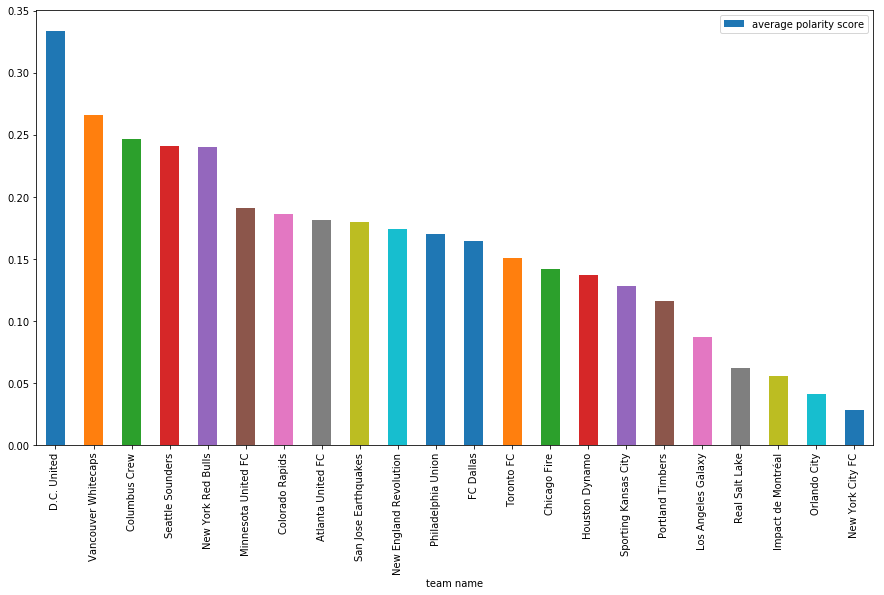

In [13]:
senti_df.plot(kind="bar",x="team name",y="average polarity score",figsize=(15,8))

In [12]:
# import 2017 attendance data
attendance_df=pd.read_csv("../Resources/MLS_2017_Attendance.csv")
attendance_df

,Rank,Team,Matches,Total,Average,Capacity,Stadium,City,State,Zip Code,Density,City Population,Land Area
0,1,Atlanta United FC,17,"819,404",48200,"72,000 (42,500)",Mercedes-Benz Stadium,Atlanta,GA,30313,"3,549","472,522",133
1,2,Seattle Sounders,17,"742,314",43666,"69,000 (39,419)",CenturyLink Field,Seattle,WA,98134,"8,391","704,352",84
2,3,Toronto FC,17,"470,005",27647,"30,991",BMO Field,Toronto,NaN,M6K3C3,"4,334","2,731,571",630
3,4,Orlando City,17,"425,477",25028,"25,500",Orlando City Stadium,Orlando,FL,32805,"2,707","277,173",102
4,5,New York City FC,17,"379,455",22321,"47,309 (30,321)",Yankee Stadium,New York City,NY,10451,"28,211","8,537,673",303
5,6,Los Angeles Galaxy,17,"378,180",22246,"27,000",StubHub Center,Carson,CA,90746,"4,957","92,797",19
6,7,Vancouver Whitecaps,17,"364,073",21416,"54,500 (22,120)",BC Place,Vancouver,NaN,V6B 4Y8,"5,492","631,486",115
7,8,New York Red Bulls,17,"359,977",21175,"25,000",Red Bull Arena,Harrison,NJ,07029,"11,319","13,620",1
8,9,Portland Timbers,17,"359,448",21144,"21,144",Providence Park,Portland,OR,97205,"4,795","639,863",133
9,10,Minnesota United FC,17,"349,138",20538,"21,895",TCF Bank Stadium,Minneapolis,MN,55455,"7,664","413,651",54


In [25]:
merged_sent_df=pd.merge(senti_df,attendance_df,left_on="team name",right_on="Team")
merged_sent_df

,team name,average polarity score,number of tweets,from,to,hash tag,Rank,Team,Matches,Total,Average,Capacity,Stadium,City,State,Zip Code,Density,City Population,Land Area
0,D.C. United,0.333909,500,Fri Jul 27 15:50:08 +0000 2018,Sat Jul 28 14:52:43 +0000 2018,['#DCU'],16,D.C. United,17,"308,664",18157,????,RFK Stadium,Washington,D.C.,1111,"11,158","681,170",61
1,Vancouver Whitecaps,0.266070,500,Fri Jul 27 00:17:58 +0000 2018,Sat Jul 28 14:41:27 +0000 2018,['#VWFC'],7,Vancouver Whitecaps,17,"364,073",21416,"54,500 (22,120)",BC Place,Vancouver,NaN,V6B 4Y8,"5,492","631,486",115
2,Columbus Crew,0.246767,1713,Wed Jul 18 18:03:15 +0000 2018,Sat Jul 28 12:37:25 +0000 2018,"['#SaveTheCrew', '#CrewSC', '#Crew96', '#ForCo...",17,Columbus Crew,17,"262,469",15439,"19,968",Mapfre Stadium,Colubus,OH,43211,"3,960","860,090",217
3,Seattle Sounders,0.241223,500,Mon Jul 23 19:37:37 +0000 2018,Sat Jul 28 14:07:59 +0000 2018,['#Sounders'],2,Seattle Sounders,17,"742,314",43666,"69,000 (39,419)",CenturyLink Field,Seattle,WA,98134,"8,391","704,352",84
4,New York Red Bulls,0.239865,996,Thu Jul 26 20:42:26 +0000 2018,Sat Jul 28 14:38:06 +0000 2018,"['#RBNY', '#REDTogether']",8,New York Red Bulls,17,"359,977",21175,"25,000",Red Bull Arena,Harrison,NJ,07029,"11,319","13,620",1
5,Minnesota United FC,0.191052,500,Mon Jul 23 23:07:57 +0000 2018,Sat Jul 28 14:41:36 +0000 2018,['#MNUFC'],10,Minnesota United FC,17,"349,138",20538,"21,895",TCF Bank Stadium,Minneapolis,MN,55455,"7,664","413,651",54
6,Colorado Rapids,0.186002,500,Wed Jul 25 00:50:04 +0000 2018,Sat Jul 28 14:50:17 +0000 2018,['#Rapids96'],17,Colorado Rapids,17,"260,476",15322,"18,061",Dick's Sporting Goods Park,Commerce City,CO,80022,"1,558","45,913",35
7,Atlanta United FC,0.181403,980,Mon Jul 23 02:53:51 +0000 2018,Sat Jul 28 14:35:55 +0000 2018,"['#ATLUTD', '#UniteAndConquer']",1,Atlanta United FC,17,"819,404",48200,"72,000 (42,500)",Mercedes-Benz Stadium,Atlanta,GA,30313,"3,549","472,522",133
8,San Jose Earthquakes,0.179927,559,Wed Jul 18 12:59:32 +0000 2018,Sat Jul 28 02:48:59 +0000 2018,"['#Quakes74', '#ForwardAsOne']",12,San Jose Earthquakes,17,"337,873",19875,"18,000",Avaya Stadium,San Jose,CA,95110,"5,808","1,025,350",177
9,New England Revolution,0.174119,500,Tue Jul 24 15:38:20 +0000 2018,Sat Jul 28 14:16:11 +0000 2018,['#NERevs'],14,New England Revolution,17,"329,233",19367,"65,878 (20,000)",Gillette Stadium,Foxborough,MA,2035,800,"16,693",20


In [26]:
polarity_x=merged_sent_df["average polarity score"]
y_value_2017=merged_sent_df["Average"]

In [27]:
from scipy import stats
from scipy.stats import linregress
(slope, intercept, r_value, _, _) = linregress(polarity_x, y_value_2017)
fit = slope * polarity_x + intercept

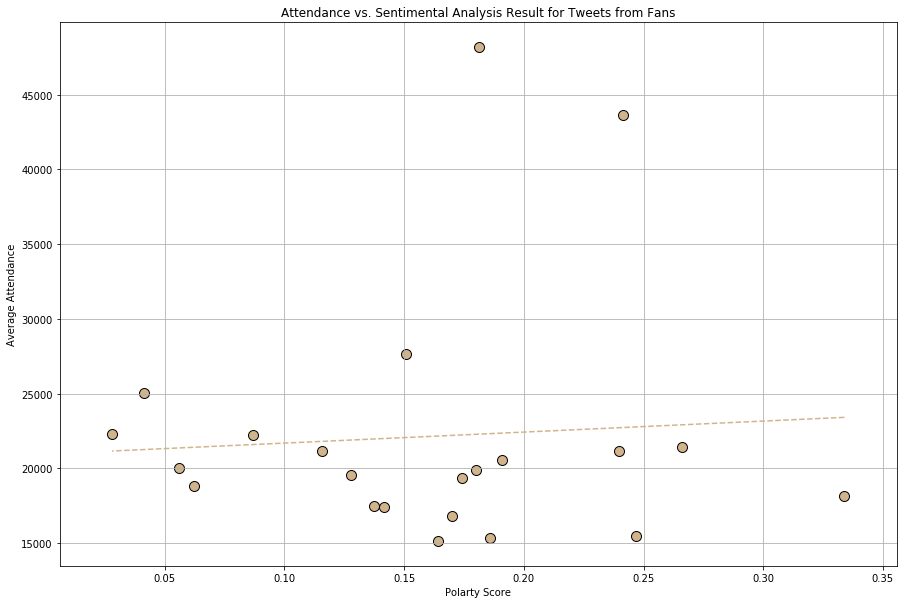

In [28]:
# Polarity Score scatter plot

plt.figure(figsize=(15,10))
plt.scatter(polarity_x, y_value_2017, marker='o',s=100,facecolors='tan',edgecolors='black')

plt.title("Attendance vs. Sentimental Analysis Result for Tweets from Fans")
plt.ylabel("Average Attendance")
plt.xlabel("Polarty Score")
plt.grid()

plt.plot(polarity_x,fit,'b--',color='tan')

plt.savefig("../Graphs/Sentimental.png")

plt.show()

In [29]:
import statsmodels.api as sm
# Individual statistical analysis for polarity score
X = merged_sent_df["average polarity score"]
y = merged_sent_df["Average"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Average   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     58.97
Date:                Sat, 28 Jul 2018   Prob (F-statistic):           1.58e-07
Time:                        11:13:31   Log-Likelihood:                -238.00
No. Observations:                  22   AIC:                             478.0
Df Residuals:                      21   BIC:                             479.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
average polarity score  1.143e+05   1.49e+04      7.679      0.000    8.33e+04    1.45e+05
==============================================================================
Omnibus:                        0.064   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.274
Skew:                           0.070   Prob(JB):                        0.872
Kurtosis:                       2.471   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""